<a href="https://colab.research.google.com/github/serinryu/AIDeepLearning-study/blob/main/RNN_based_Movie_Sentiment_Classification/RNN_based_Movie_Sentiment_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **RNN 신경망 : 영화평 Sentiment 분석(Text Sentiment analysis)** 
: 순환신경망

: 텍스트 및 시계열 학습에 주로 사용되는 LSTM을 불러오고, 기초적인 모델 튜닝 방법과 워드 임베딩을 사용하여 텍스트를 학습하는 방법을 알아봅니다.

---

> ### ✏️ problem definition
- Sentiment analysis
  - Movie reviews provided by IMDB
  - Analysis of sentiment by two classification (binary classification)
- [`Movie review sentences`] -> [`Classification model`] -> [`POSITIVE` / `NEGATIVE`]


> ### ✏️ solution design
1. input
  - IMDB n sentences
2. pre-processing
  - Tokenization Embedding
3. Sequence modeling
  - LSTM layer (# layer : 1)
  - fully connected layer (# layer : 1)
  - Softmax activation
  - loss function: Cross entropy 
4. output
  - predicted label size : 2
5. evaluation
  - accuracy graph
  - loss graph
6. analysis
  - Confusion matrix


# 1. Load Sentence Data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv ('/content/drive/MyDrive/Colab Notebooks/인공지능(2022-1)/data/IMDB.csv', engine='python')
data = data[['review','sentiment']]
print(data.shape)

(50000, 2)


#2. Pre-processing

### 2.1 Sentence Preprocessing
Task: Preprocess the sentences as simple one

In [ ]:
#Remove all special characters. Remain only alphabet and digits

In [ ]:
import re
data['review'] = data['review'].apply((lambda x: re.sub (r'[^A-Za-z0-9\s]','',x)))
# re.sub (re, replace,target) : Replace target string if the character matches with regular expression
# Target regular expression [^A-Za-z0-9\s] : All characters except English alphabets, digits and whitespace character

### 2.2 Sentence Vectorization

- Task: Transform a sentence as a vector which is numerical form (One-hot encoding)

In [ ]:
#Declare the tokenizer with 2000 words, and fit the tokenizer to text, changing characters to lowercase
from tensorflow.keras.preprocessing.text import Tokenizer
max_features= 2000
tokenizer = Tokenizer(num_words=max_features, split=' ', lower=True, oov_token=True)
tokenizer.fit_on_texts(data['review'].values)

In [ ]:
#Get sequence from tokenizer and pad the sequence as same length
from tensorflow.keras.preprocessing.sequence import pad_sequences
max_sentence_len= 40
X = tokenizer.texts_to_sequences(data['review'].values)
X = pad_sequences(X, maxlen=max_sentence_len)
print('Data_shape:', X.shape)

Data_shape: (50000, 40)


### 2.3 Sentence Embedding
- Task: Transform the one hot encoded vector as the one having semantic
relation

In [ ]:
#Declare the model as a sequence of layers
from tensorflow.keras.models import Sequential
model = Sequential()

In [ ]:
#Add embedding layer to the model in the top
from tensorflow.keras.layers import Embedding
embed_dim = 256
model.add(Embedding(max_features , embed_dim , input_length = X.shape[1]))

#3. Sequence Modeling 

- Task: Task: Add LSTM layer and fully connected layer to the model




### 3.1 Add LSTM layer with tanh activation and the number of unit as 128
- Activation: relu
- Dropout rate: 0.4

In [ ]:
from tensorflow.keras.layers import LSTM
lstm_unit = 128
model.add(LSTM(lstm_unit, activation='relu', dropout=.4))

### 3.2 Add fully connected layer (=dense layer) in bottom of model sequence

- Output size is 2 since the problem is two class classification
- Softmax activation makes the final output in classification task
- Output value means which class the model choose about the input

In [ ]:
from tensorflow.keras.layers import Dense
model.add (Dense(2,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 40, 256)           512000    
                                                                 
 lstm (LSTM)                 (None, 128)               197120    
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 709,378
Trainable params: 709,378
Non-trainable params: 0
_________________________________________________________________


### 3.3 Model Summary
- Purpose: Print entire model to see the model structure

In [ ]:
from keras.layers import SpatialDropout1D
embed_dim = 256
lstm_unit = 128
model = Sequential()
model.add(Embedding(max_features , embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_unit , dropout=0.2, recurrent_dropout =0.2))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 40, 256)           512000    
                                                                 
 spatial_dropout1d (SpatialD  (None, 40, 256)          0         
 ropout1D)                                                       
                                                                 
 lstm_1 (LSTM)               (None, 128)               197120    
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 709,378
Trainable params: 709,378
Non-trainable params: 0
_________________________________________________________________


### 3.4 Training Model
- Task: Define training settings and run the training process

In [ ]:
#Split the data to train data and test data as 50 to 50

from sklearn.model_selection import train_test_split
Y = pd.get_dummies(data['sentiment']).values
X_train, X_test, Y_train, Y_test= train_test_split(X,Y, test_size= 0.50, random_state= 50)

In [ ]:
#Compile the model with defining loss function and optimizer
from tensorflow.keras.optimizers import Adam
opt = Adam(lr=.00003)
model.compile(loss = 'categorical_crossentropy', optimizer=opt, metrics = ['accuracy'])
history = model.fit(X_train, Y_train, epochs = 10, batch_size=64, validation_split=0.1, verbose = 1, shuffle=True)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


352/352 [==============================] - 76s 208ms/step - loss: 0.6907 - accuracy: 0.5521 - val_loss: 0.6875 - val_accuracy: 0.5956
Epoch 2/10
352/352 [==============================] - 74s 210ms/step - loss: 0.6441 - accuracy: 0.6473 - val_loss: 0.5874 - val_accuracy: 0.7040
Epoch 3/10
352/352 [==============================] - 72s 205ms/step - loss: 0.5619 - accuracy: 0.7115 - val_loss: 0.5400 - val_accuracy: 0.7352
Epoch 4/10
352/352 [==============================] - 73s 208ms/step - loss: 0.5214 - accuracy: 0.7413 - val_loss: 0.5138 - val_accuracy: 0.7580
Epoch 5/10
352/352 [==============================] - 73s 207ms/step - loss: 0.4967 - accuracy: 0.7559 - val_loss: 0.4975 - val_accuracy: 0.7680
Epoch 6/10
352/352 [==============================] - 73s 207ms/step - loss: 0.4806 - accuracy: 0.7655 - val_loss: 0.4868 - val_accuracy: 0.7696
Epoch 7/10
352/352 [==============================] - 72s 206ms/step - loss: 0.4653 - accuracy: 0.7746 - val_loss: 0.4801 - val_accuracy: 0.7

# 4. Performance Analysis
- Task: Show the trails of performances changed by the training epochs

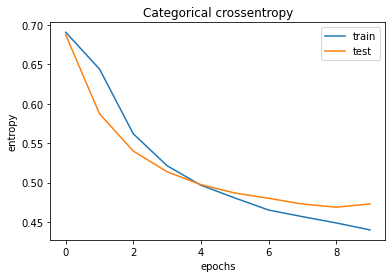

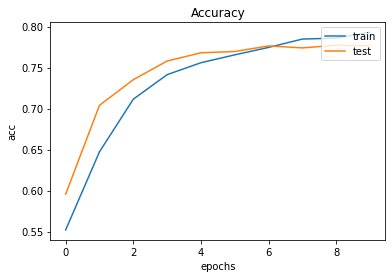

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Categorical crossentropy')
plt.ylabel('entropy')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('acc')
plt.xlabel('epochs')
plt.legend(['train','test'], loc='upper right')
plt.show()

# 5. Evaluate Model

- Task: Evaluate the model using test data

In [ ]:
#Evaluate trained model and print the performance
score,acc= model.evaluate(X_test, Y_test, verbose = 2, batch_size= 32)
print("Categorical crossentropy: %.2f" % (score))
print("Accuracy: %.2f" % (acc))

782/782 - 23s - loss: 0.6188 - accuracy: 0.7694 - 23s/epoch - 29ms/step
Categorical crossentropy: 0.62
Accuracy: 0.77


# 6. Parameter Tuning
- Task: Try training process with another settings

In [ ]:
# ex1. Compile the model with another optimizer (SGD, RMSprop , Adadelta , Adagrad , Adam)
model.compile(loss = 'categorical_crossentropy',optimizer='adam',metrics = ['accuracy'])
model.fit(X_train, Y_train, epochs = 10, batch_size=32, validation_split=0.1, verbose = 2)

Epoch 1/10
704/704 - 100s - loss: 0.4699 - accuracy: 0.7749 - val_loss: 0.5024 - val_accuracy: 0.7696 - 100s/epoch - 143ms/step
Epoch 2/10
704/704 - 98s - loss: 0.4241 - accuracy: 0.8027 - val_loss: 0.4579 - val_accuracy: 0.7764 - 98s/epoch - 139ms/step
Epoch 3/10
704/704 - 98s - loss: 0.3941 - accuracy: 0.8187 - val_loss: 0.4561 - val_accuracy: 0.7788 - 98s/epoch - 139ms/step
Epoch 4/10
704/704 - 98s - loss: 0.3701 - accuracy: 0.8329 - val_loss: 0.4766 - val_accuracy: 0.7736 - 98s/epoch - 139ms/step
Epoch 5/10
704/704 - 98s - loss: 0.3434 - accuracy: 0.8473 - val_loss: 0.4686 - val_accuracy: 0.7876 - 98s/epoch - 139ms/step
Epoch 6/10
704/704 - 97s - loss: 0.3183 - accuracy: 0.8606 - val_loss: 0.4955 - val_accuracy: 0.7816 - 97s/epoch - 138ms/step
Epoch 7/10
704/704 - 98s - loss: 0.2929 - accuracy: 0.8727 - val_loss: 0.5044 - val_accuracy: 0.7788 - 98s/epoch - 139ms/step
Epoch 8/10
704/704 - 98s - loss: 0.2690 - accuracy: 0.8848 - val_loss: 0.5612 - val_accuracy: 0.7792 - 98s/epoch - 1

In [ ]:
# ex2. Change the number of units of LSTM layer (Too many layers and epochs would result in overfitting)
from keras.layers import LSTM
lstm_unit= 128
model.add(LSTM(lstm_unit, activation=‘tanh’))

SyntaxError: ignored

# 7. User Input Test
- Task: Test the model using the sentence what you want

In [ ]:
#Input the sentence as a list type, and preprocess like above
sentence = 'I wanted to like this film and expected there to be a decent resolution to the breakdown of equilibrium but alas no, it left me feeling like Id wasted my time and the film makers had wasted their money'
sentence = tokenizer.texts_to_sequences([sentence])
#padding the tweet to have exactly the same shape as `embedding_2` input
sentence = pad_sequences(sentence, maxlen=max_sentence_len, dtype='int32', value=0)

In [ ]:
#Predict the sentiment of your own sentence using the model
import numpy as np
sentiment = model.predict(sentence, batch_size=1, verbose = 2)[0]
if(np.argmax(sentiment) == 0):
  print("negative")
elif(np.argmax(sentiment) == 1):
  print("positive")

1/1 - 1s - 530ms/epoch - 530ms/step
negative
